In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

### [체질검사] 
체질 비만도를 예측하기 위한 의사결정나무 분석을 실시하고 결과를 해석하시오.

#### 1.데이터 구성하기

In [2]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2_py/체질검사.csv")

In [4]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


#### 2.모델 생성

In [12]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

#데이터의 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 1.000
Score on test set: 0.295


train 데이터의 설명력은 100%, 반면 test 데이터의 설명력은 아주 낮음 : 과대적합

In [8]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [15]:
#모델 parameter 조정

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수
para_leaf =[n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [16]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


score가 크면서 둘의 차이가 가장 작은 것을 찾는다! (minsamplesleaf : 8 or 16 인거 선택!)

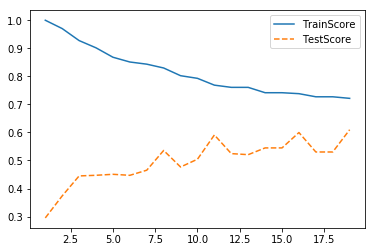

In [17]:
#모델 설명력 그래프 확인
plt.plot(para_leaf,train_score, linestyle='-',label='TrainScore')
plt.plot(para_leaf,test_score, linestyle='--',label='TestScore')
plt.legend()

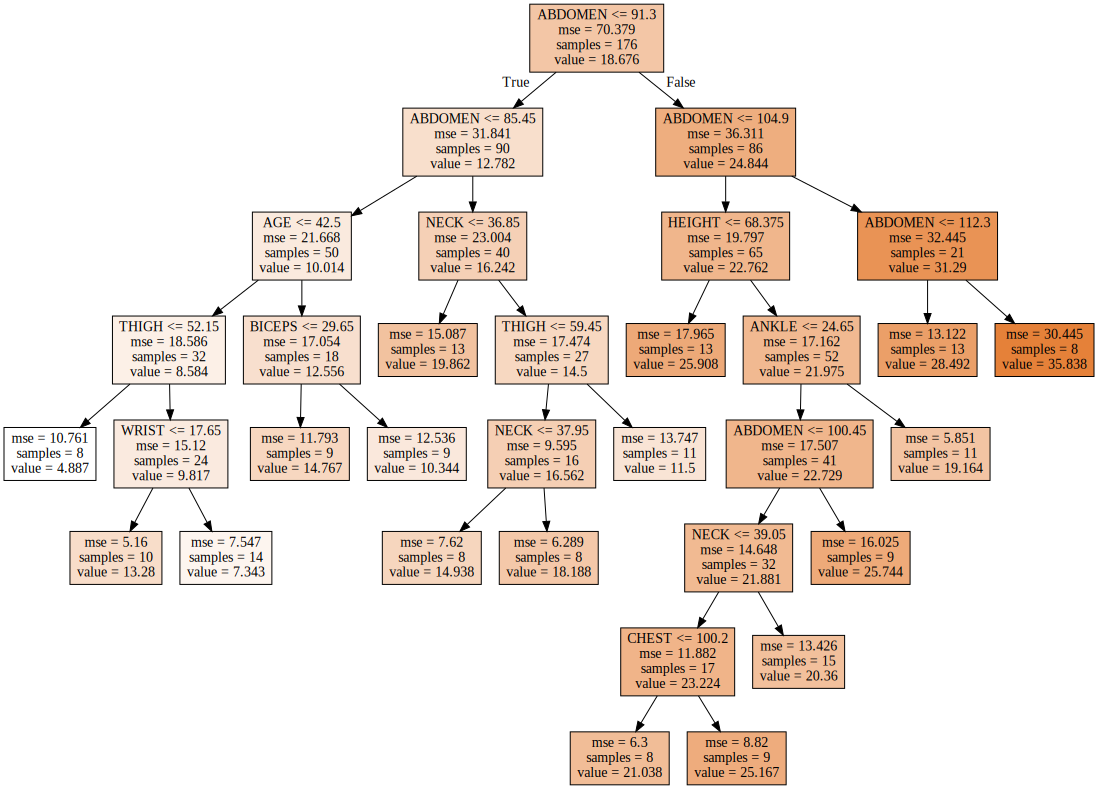

In [19]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 8
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

value 는 평균

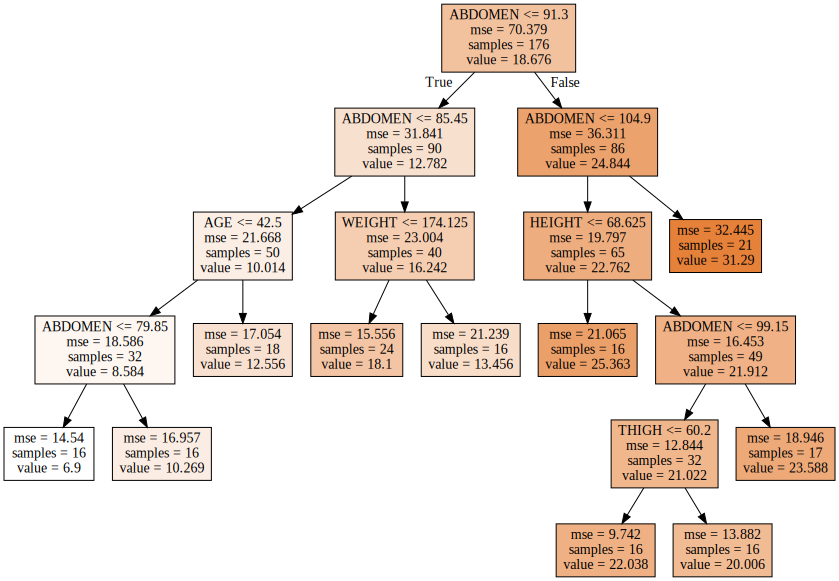

In [24]:
#노드의 최소 자료 수 16
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [30]:
#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수
para_split =[n_leaf * 2 for n_leaf in range(8,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,16,0.830,0.536
1,18,0.821,0.557
2,20,0.813,0.581
3,22,0.792,0.567
4,24,0.792,0.567
5,26,0.775,0.576
6,28,0.762,0.540
7,30,0.762,0.540
8,32,0.762,0.540
9,34,0.745,0.541


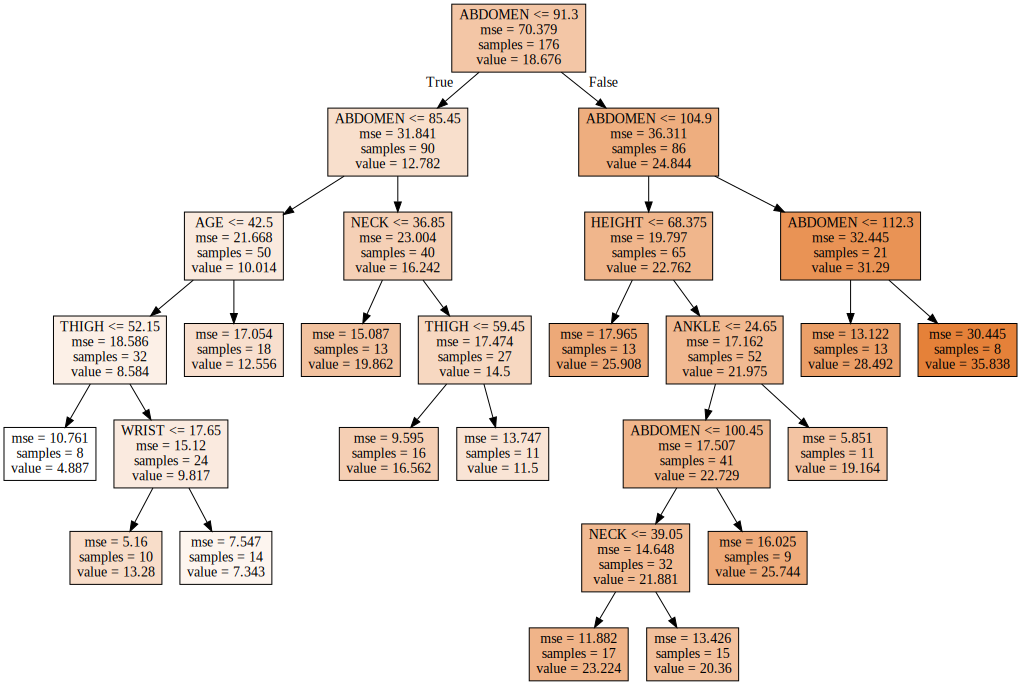

In [32]:
#분리노드의 최소 자료 수 20
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

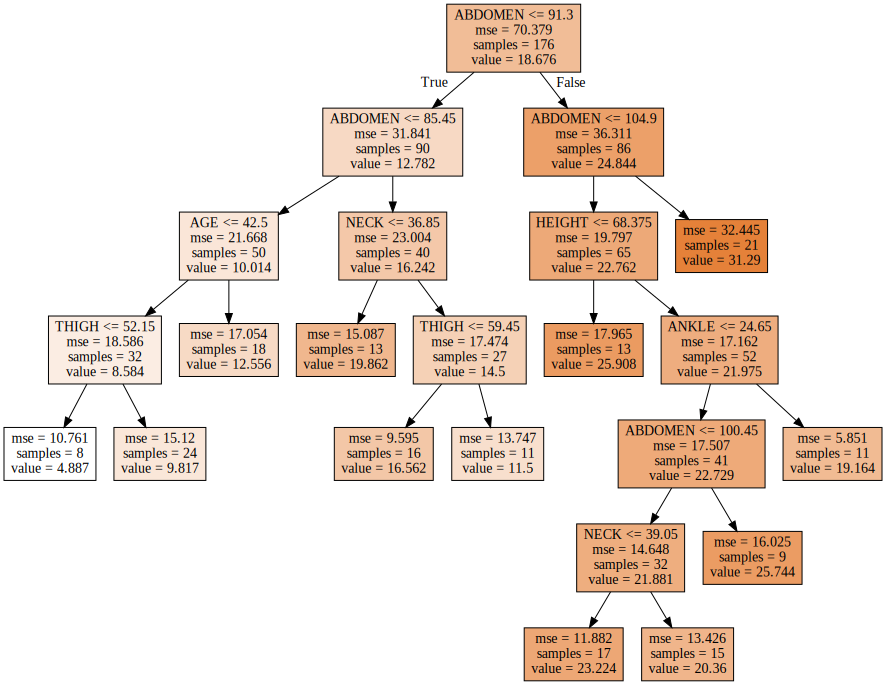

In [33]:
#분리노드의 최소 자료 수 26
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split=26)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [34]:
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

#최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,
                                 min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


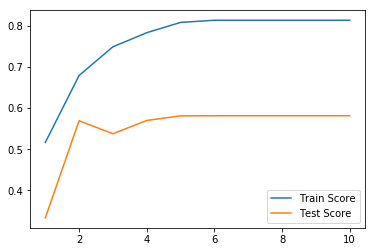

In [35]:
#모델 설명력 확인
df_score_depth.round(3)

#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='-', label='Test Score')
plt.legend()

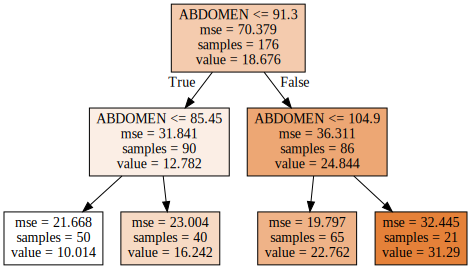

In [38]:
#최대 깊이 2모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

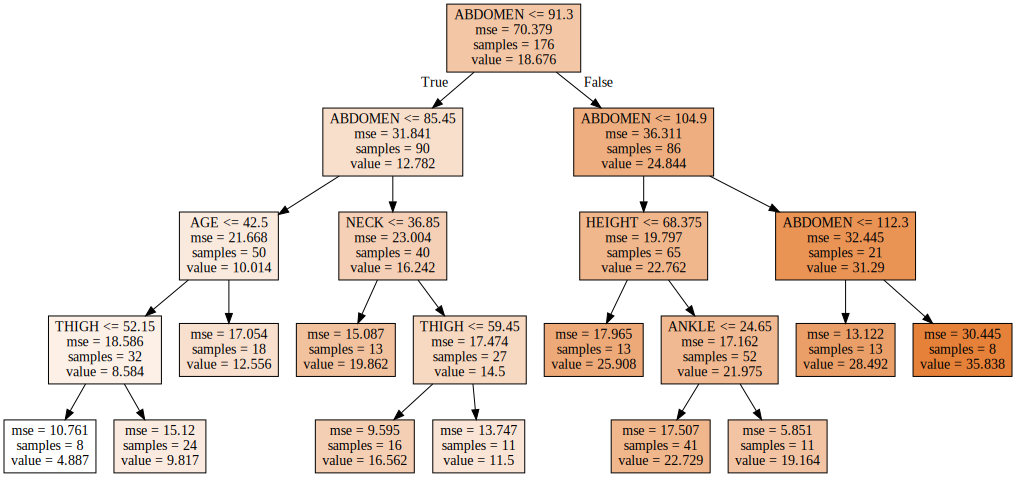

In [39]:
#최대 깊이 4모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 3.최종 모델 생성

In [41]:
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20,
                                   max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [43]:
#train score, test score 값 구하기

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set: 0.783
Score on test set: 0.570


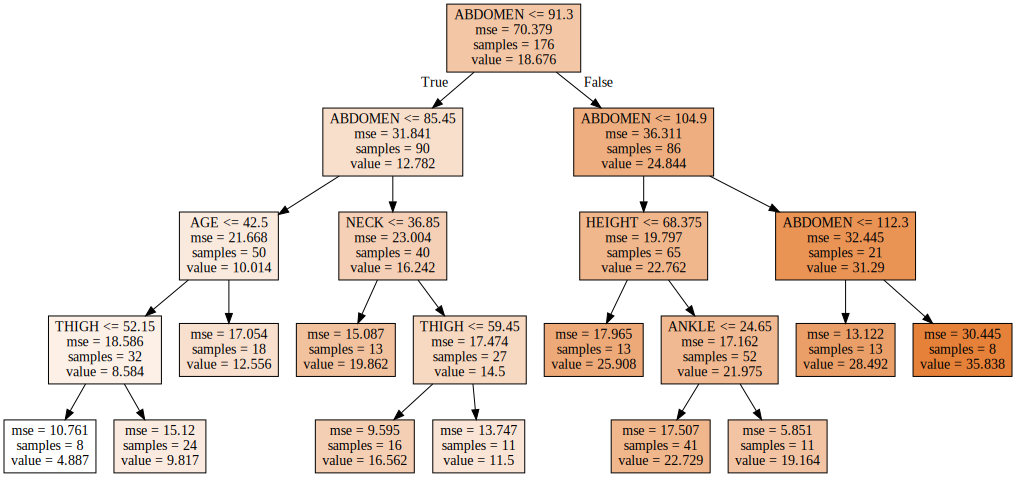

In [44]:
#최종 모델 시각화
export_graphviz(tree_final,out_file='tree_final.dot',
               feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 4.결론 도출

In [45]:
#설명변수의 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별 정렬
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

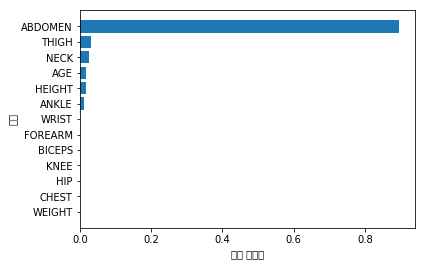

In [46]:
#설명변수 중요도 그래프
#중요도가 높은 그림을 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [53]:
#모델 parameter 조정 - (2단계 내용 추가)

estimator =DecisionTreeRegressor()

param_grid ={'criterion':['mse','friedman_mse','mae'], 'max_features':['auto','sqrt','log2'],
            'max_depth':para_depth, 'min_samples_split':para_split,
            'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=18,
           min_samples_split=38, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter:
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 38}

best score:
0.631


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
